In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import xarray as xr
import numpy as np

import glob
import os

%matplotlib inline

In [2]:
lat_min=35
lon_min=-65
lat_max=65
lon_max=20

In [3]:
# etopo file
ef = '/home/soontiensn/data/ocn-nav/ETOPO1_Bed_g_gmt4.grd'
etopo = xr.open_dataset(ef)
esel = etopo.sel(x=slice(lon_min, lon_max), y=slice(lat_min, lat_max))

In [4]:
#stokes = glob.glob('data/stokes_*')
#SVPs = glob.glob('data/SVP_*')
spotter = 'data/SPOT-1017_2021-12-06_2022-10-13_download.csv'
#oskers = 'data/OSKERS_DFO-GrandBanks2021.csv'

In [5]:
def plot_map(ax,lon_min=lon_min, lon_max=lon_max, lat_min=lat_min, lat_max=lat_max):
    bmap = Basemap(projection='merc',llcrnrlon=lon_min, urcrnrlon=lon_max,
                   llcrnrlat=lat_min,urcrnrlat=lat_max, ax=ax,resolution='i')
    bmap.drawcoastlines()
    bmap.fillcontinents(color='grey',)
    bmap.drawparallels(np.arange(lat_min, lat_max, 5.),labels=[1,0,0,0])
    bmap.drawmeridians(np.arange(lon_min, lon_max,5.),labels=[0,0,0,1])
    return bmap

In [6]:
def plot_bathymetry(bmap, ax, etopo):
    lons = etopo.x.values
    lats = etopo.y.values
    lons, lats = np.meshgrid(lons,lats)
    x, y = bmap(lons, lats)
    bathy = etopo.z.values
    levels = [-500, -100,]
    CS = bmap.contour(x,y,bathy,levels, linestyles='solid', linewidth=0.1,colors='black')
    ax.clabel(CS, CS.levels, inline=True, fmt='%1.0f', fontsize=12)

In [7]:
def plot_spotter(fname, bmap):
    d = pd.read_csv(fname)
    x, y = bmap(d['Longitude (deg)'].values,d['Latitude (deg)'].values)
    bmap.plot(x,y,color='b', label='SPOT-1017')
        

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3337: DtypeWarning: Columns (5,6,7,8,9,10,11,365,366,367,380) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


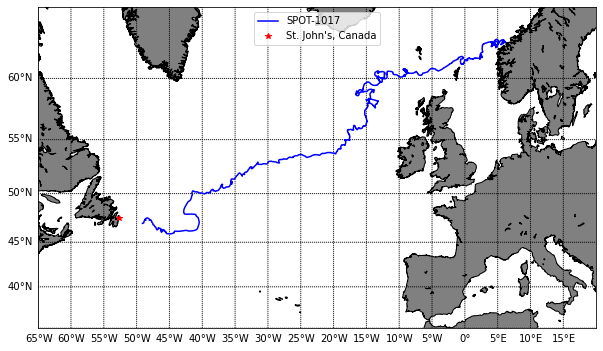

In [8]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
bmap = plot_map(ax)
#plot_bathymetry(bmap,ax,esel)
plot_spotter(spotter, bmap)
x,y=bmap(-52.7126,47.5615)
ax.plot(x,y,'r*',label="St. John's, Canada")
ax.legend()

In [9]:
fig.savefig('SPOT-1017_recovery.png', bbox_inches='tight')